### Xente Fraud Detection Challenge

#### Goal
The goal of this project is to create a machine learning model to detect fraudulent transactions.


#### Introduction

Xente is an e-payments, e-commerce, and financial services company in Uganda offering various products and services that can be paid for using Mobile Money (Airtel Money, MTN Mobile Money), Bank Card (Visa Card, Master Card), Xente wallet and on credit (Pay Later). Some of the products consumers can buy include airtime, data bundles, pay water and electricity bills, TV subscription services, buy event tickets, movie tickets, bus tickets, and more.

#### Evaluation
The error metric for this competition is the F1 score, which ranges from 0 (total failure) to 1 (perfect score). Hence, the closer your score is to 1, the better your model.

F1 Score: A performance score that combines both precision and recall. It is a harmonic mean of these two variables. Formula is given as: 2*Precision*Recall/(Precision + Recall)

Precision: This is an indicator of the number of items correctly identified as positive out of total items identified as positive. Formula is given as: TP/(TP+FP)

Recall / Sensitivity / True Positive Rate (TPR): This is an indicator of the number of items correctly identified as positive out of total actual positives. Formula is given as: TP/(TP+FN)

Where:

TP=True Positive
FP=False Positive
TN=True Negative
FN=False Negative

### Importing the libraries

In [2]:
import pandas as pd # data handling
import numpy as np

from scipy.stats import skew
from scipy import stats
from scipy.stats import norm

# Modelling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = "{:,.2f}".format
import warnings
warnings.filterwarnings('ignore')

#### 2. Exploring the data

    2.1. Checking for how many rows and columns
    2.2. Checking for the column names how many rows and columns
    2.3. Checking for type of data present in the dataframe
    2.4. Checking for null values in each column
    2.5. Checking for unique values
    2.6. Finding the descriptive statistics
    2.7. Checking for duplicates
    2.8. Checking for data imbalance
    2.9. Plotting histogram for float/integer features
    2.10. Correlation heat map
    2.11. Checking for outliers
  

In [6]:
df_train = pd.read_csv("data/train_data.csv", sep = ",")

In [7]:
# reading the data set
df_train.head(2)

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,"1,000.00",1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.00,20,2018-11-15T02:19:08Z,2,0


In [8]:
#Checking for how many rows and columns
df_train.shape

(95662, 16)

In [9]:
#Checking for the column names
df_train.columns

Index(['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId',
       'CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId',
       'ProductCategory', 'ChannelId', 'Amount', 'Value',
       'TransactionStartTime', 'PricingStrategy', 'FraudResult'],
      dtype='object')

In [10]:
#Checking for null values in each column
df_train.isnull().sum()

TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

In [11]:
# Checking for type of data present in the dataframe
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [12]:
# Checking for unique values
df_train.nunique()

TransactionId           95662
BatchId                 94809
AccountId                3633
SubscriptionId           3627
CustomerId               3742
CurrencyCode                1
CountryCode                 1
ProviderId                  6
ProductId                  23
ProductCategory             9
ChannelId                   4
Amount                   1676
Value                    1517
TransactionStartTime    94556
PricingStrategy             4
FraudResult                 2
dtype: int64

In [13]:
# Finding the descriptive statistics
df_train.describe()

,CountryCode,Amount,Value,PricingStrategy,FraudResult
count,"95,662.00","95,662.00","95,662.00","95,662.00","95,662.00"
mean,256.00,"6,717.85","9,900.58",2.26,0.00
std,0.00,"123,306.80","123,122.09",0.73,0.04
min,256.00,"-1,000,000.00",2.00,0.00,0.00
25%,256.00,-50.00,275.00,2.00,0.00
50%,256.00,"1,000.00","1,000.00",2.00,0.00
75%,256.00,"2,800.00","5,000.00",2.00,0.00
max,256.00,"9,880,000.00","9,880,000.00",4.00,1.00


In [14]:
# Checking for duplicates

def check_duplicates(data):
    has_dup = data.duplicated()
    true_dup = np.where(has_dup == True)
    if len(true_dup[0]) > 0:
        print("Data has", len(true_dup[0]), "duplicates")
    else:
        print("No duplicates found !!!")

check_duplicates(df_train)

No duplicates found !!!


In [31]:
# Checking for data imbalance
print(df_train['FraudResult'].value_counts()[0])
print(df_train['FraudResult'].value_counts()[1])

95469
193


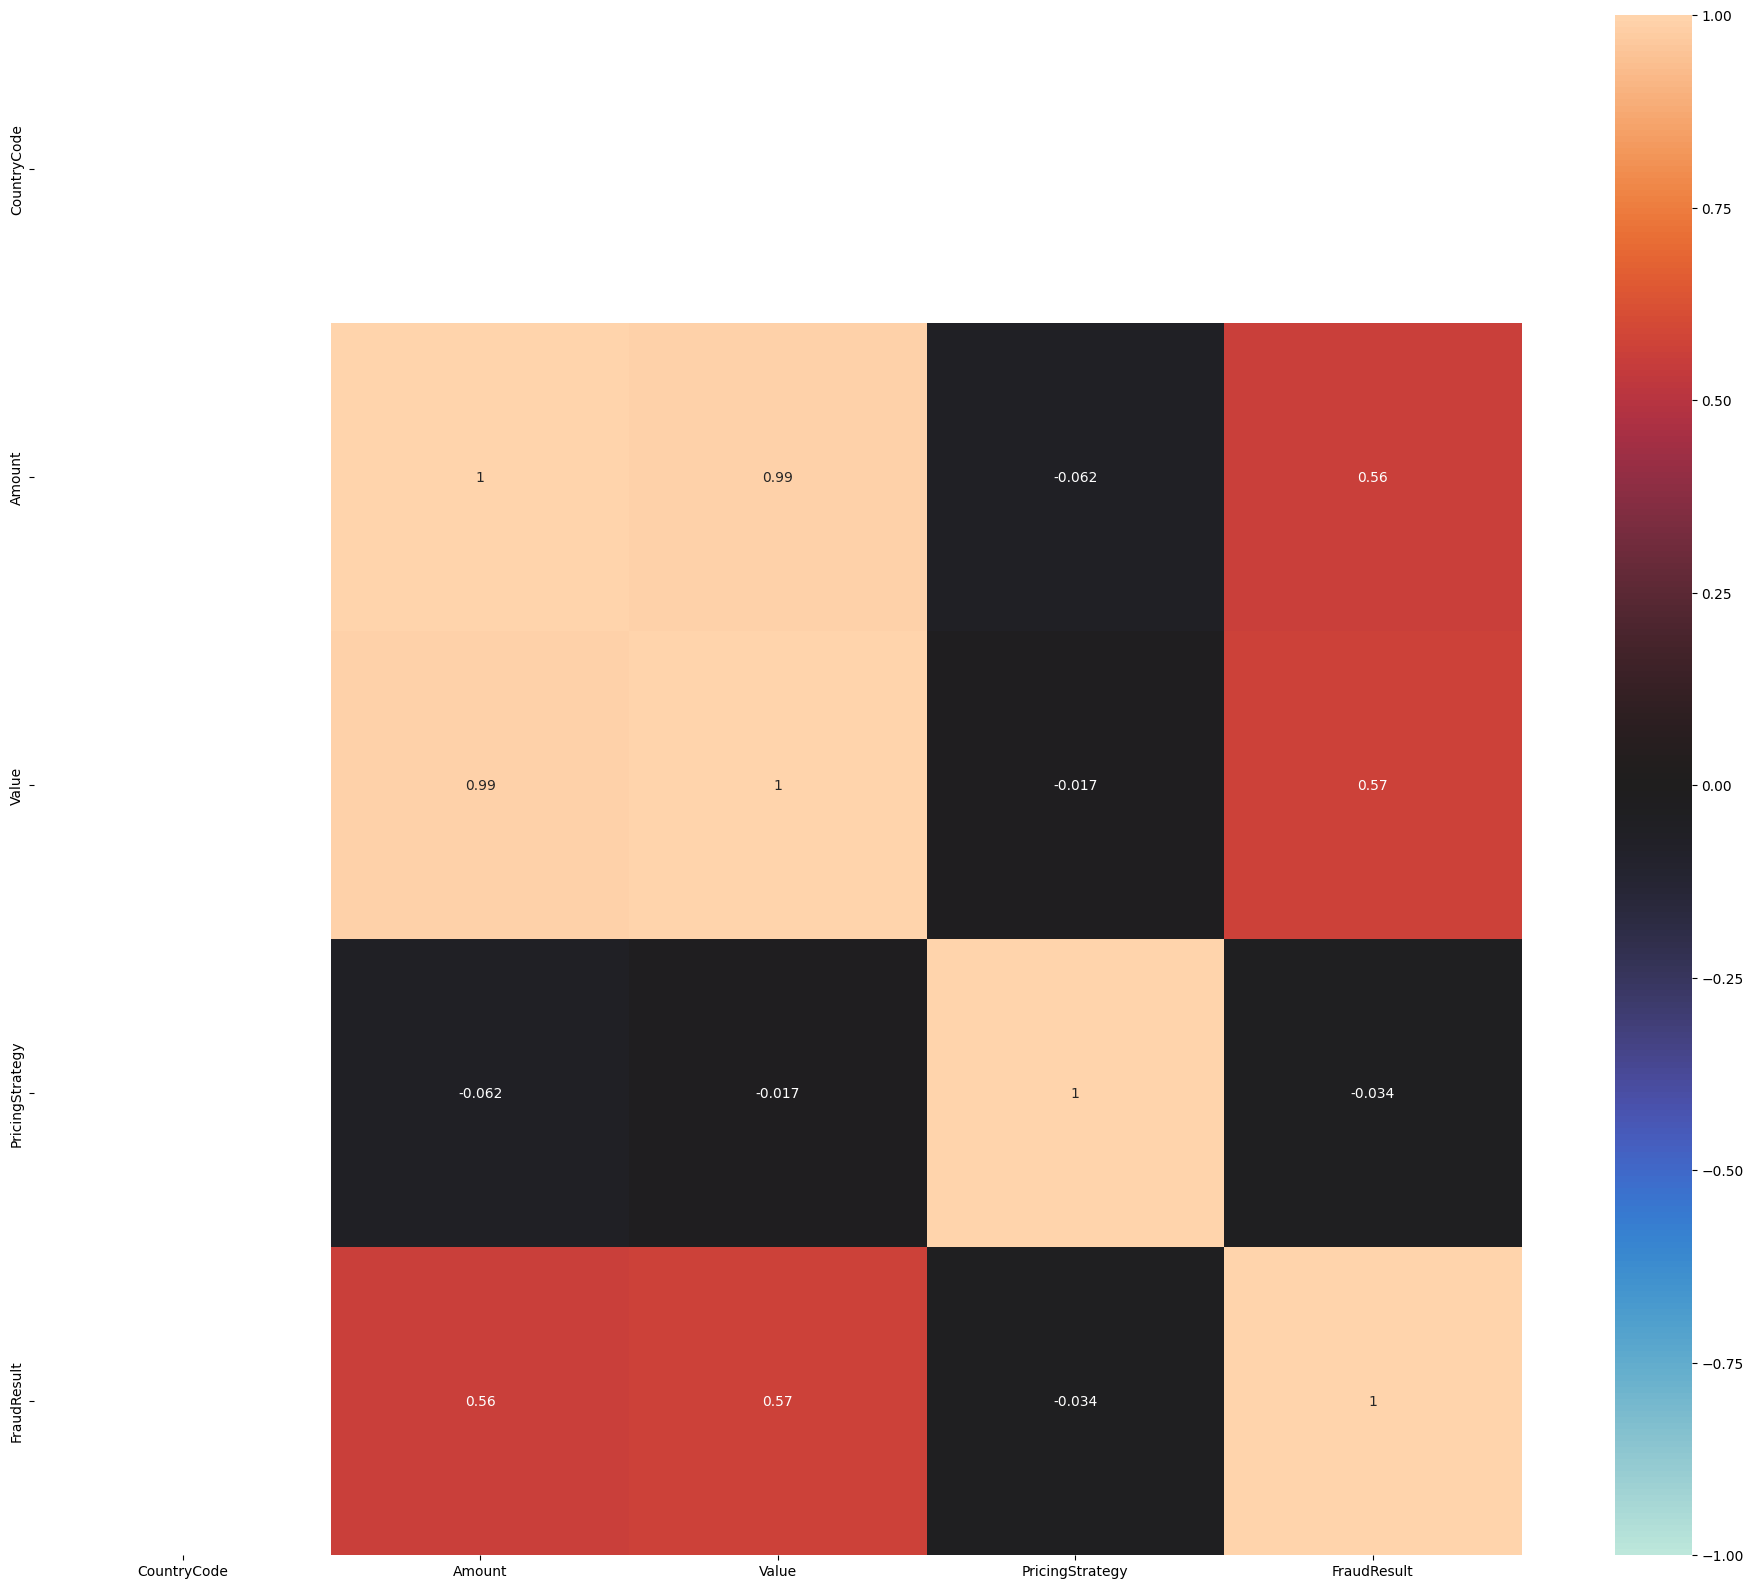

In [15]:
plt.figure(figsize=[24,20])
sns.heatmap(df_train.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()
plt.savefig('images/1.png');

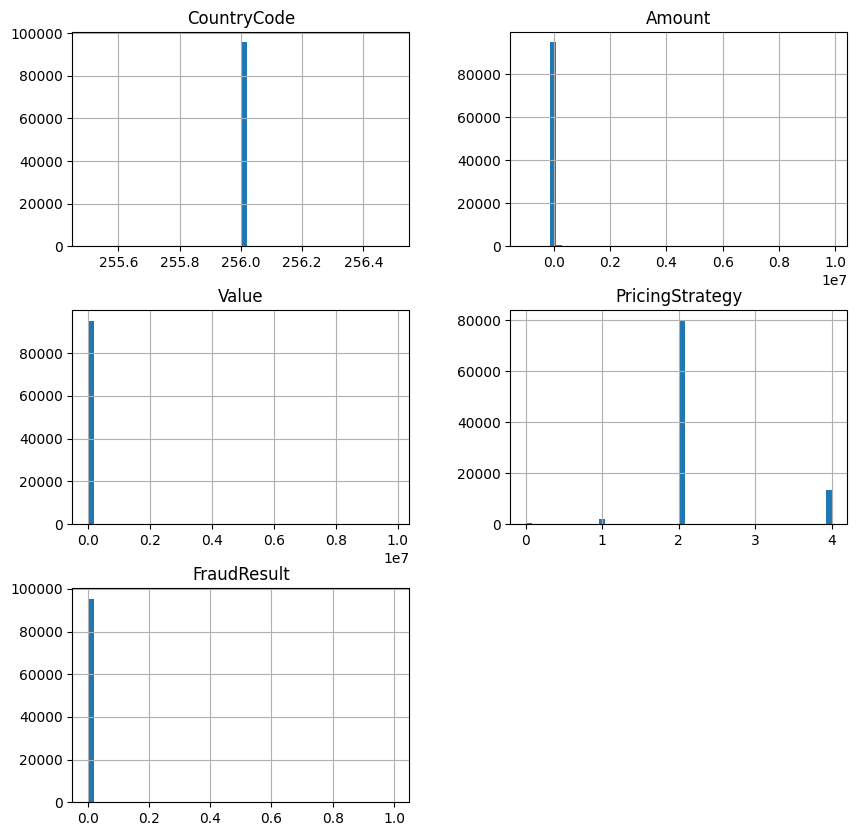

In [22]:
# Plotting histogram for float/integer features 
df_train.hist(bins=50, figsize=(10,10))
plt.savefig('images/2.png');

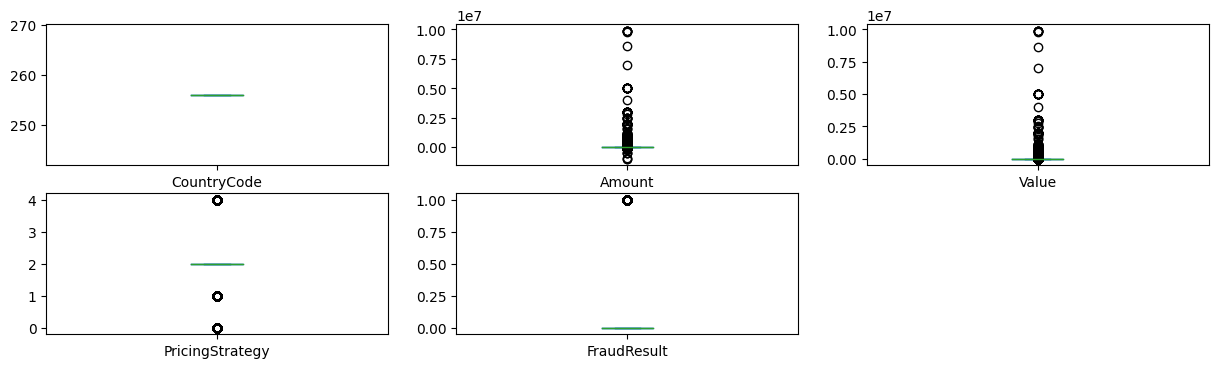

In [25]:
# Checking for Outliers
df_train.plot(kind='box', subplots=True, layout=(7,3), figsize=(15,15)) #
plt.savefig('images/2.png');